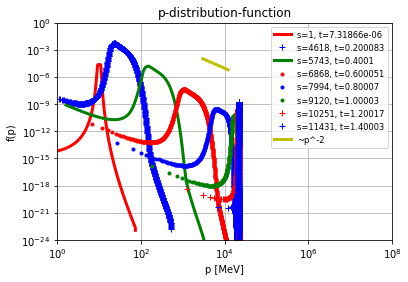

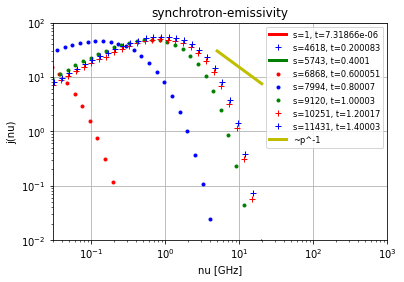

In [7]:
#
# Copyright (C) 2020 Francesco Miniati <francesco.miniati@gmail.com>
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
#
## %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import numpy as np
import math

# style
stl=('r-','b+','g-','r.','b.','g.','r+','b+','g+')

def plot_file(_filename, _prm, _strd=1, _min=0, _max=-1) :
    sc=-1
    sp=1
    with open(_filename) as fn:
        for l in fn:
            if (l[0] != '#'):
                sp=sp+1
                l=l.split('   ')
                s=int(l[0])
                #print("s=",s,", min=",_min)
                t=l[1]
                p=[float(z) for z in l[2:2+len(l)//2-1]]
                f=[float(z) for z in l[2+len(p):-1]]
                #print 'Lf=',len(f)
                label='s='+str(s)+', t='+str(t)
                #label='t='+str(t)+' Gyr'
                if (sp%_strd==0 and s>=_min and (s<=_max or _max==-1)):
                    sc=sc+1
                    plt.plot(p,f,stl[sc%len(stl)],linewidth=3,label=label)
    #
    idx=int(_prm['plidx'])
    p =[_prm['plpo']*x for x in range(1,5,1)]
    pl= _prm['plfo']* np.power(p,-idx) *np.power(_prm['plpo'],idx)
    plt.plot(p,pl,'y-',linewidth=3,label='~p^-'+str(idx))
    ###
    plt.xscale(_prm['xscl'])
    plt.yscale(_prm['yscl'])
    plt.xlim(_prm['xlim'])
    plt.ylim(_prm['ylim'])
    #labels
    plt.grid()
    plt.xlabel(_prm['xlbl'])
    plt.ylabel(_prm['ylbl'])
    plt.legend(loc='best',fontsize='small')
    plt.title(_prm['ttl'])
    #
    plt.show()
    #
    #
# file: evolution of f(p)
path='../exe/'
fp_file=path+'oxcr_data.dat'
fp_prm={'plidx':2,'plfo':1.e-4,'plpo':3.e3,'xscl':'log','yscl':'log',
         'xlim':[1.e0,1e8],'ylim':[1.e-24,1.e0],
         'xlbl':'p [MeV]','ylbl':'f(p)',
         'ttl':'p-distribution-function'}
#plot_file(fp, fp_prm,1,1,-1)
plot_file(fp_file,fp_prm,2,1)

sy_file=path+'sync_spectrum.dat'
sy_prm={'plidx':1,'plfo':3.e1,'plpo':5e0,'xscl':'log','yscl':'log',
         'xlim':[3.e-2,1e3],'ylim':[1.e-2,1.e2],
         'xlbl':'nu [GHz]','ylbl':'j(nu)',
         'ttl':'synchrotron-emissivity'}

plot_file(sy_file,sy_prm,2,1,-1)